In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt

In [3]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [4]:
list(mnist)

['data',
 'target',
 'frame',
 'feature_names',
 'target_names',
 'DESCR',
 'details',
 'categories',
 'url']

In [5]:
mnist.data.shape

(70000, 784)

In [6]:
mnist.target.shape

(70000,)

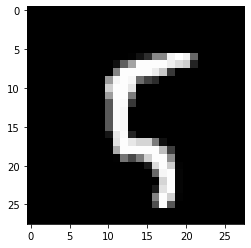

In [7]:
plt.imshow(mnist.data[100].reshape(28,28),cmap='gray')

In [8]:
images = (0.99 * mnist.data + 0.01)/ 255

In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [10]:
num = mnist.target.shape[0]
print(num)

70000


In [11]:
# one-hot encode the y_true values
y_true = np.zeros((num,10))
for i in range(num):
    y_true[i,int(mnist.target[i])] = 1

In [12]:
X_train,X_test,y_train,y_test = \
train_test_split(mnist.data,
                 y_true,
                 test_size = 0.8, 
                 random_state = 42)
size = X_train.shape[0]
print(size)
#for i in range(size):
#    print(np.argmax(y_train[i]))

14000


In [13]:
input_layer = 784
hidden_layer = 64
output_layer = 10

w1 = np.random.normal(0,
                      1/np.sqrt(input_layer),
                      size = (hidden_layer,input_layer))
#print('w1: ',w1.shape)
w2 = np.random.normal(0,
                      1/np.sqrt(hidden_layer),
                      size = (output_layer,hidden_layer))
#print('w2: ',w2.shape)
b1 = np.ones((hidden_layer,1))
#print('b1: ',b1.shape)
b2 = np.ones((output_layer,1))
#print('b2: ',b2.shape)

#w1 = w1.astype('float128')
#w2 = w2.astype('float128')
#b1 = b1.astype('float128')
#b2 = b2.astype('float128')


lr = .001
epochs = [x for x in range(50)]
Error = 0
for epoch in epochs:
    error = 0
    cnt = 0
    for i in range(size):
        # get the true value
        t = y_train[i].reshape(output_layer,1)
        # set nodes
        x0 = X_train[i].reshape(input_layer,1)
        x1 = sigmoid(w1.dot(x0)+b1)
        x2 = sigmoid(w2.dot(x1)+b2)
        # calculate errors
        error += np.sum((x2 - t)*(x2 - t))
        derr = (x2 - t)
        
        #calculate deltas
        delta_layer2 = (derr * (x2 * (1-x2)))        
        delta_layer1 = (((w2.T).dot(delta_layer2)) * (x1 * (1-x1)))
        
        #clean up notation
        w2 = w2 - lr * delta_layer2.dot(x1.T)
        b2 = b2 - lr * delta_layer2
        w1 = w1 - lr * delta_layer1.dot(x0.T)
        b1 = b1 - lr * delta_layer1
        #calculate how many are correct, for accuracy
        cnt += np.argmax(x2) == np.argmax(t)
    if epoch%1 == 0:
        print(f'Epoch {epoch}; Error is {error:.5f}; Accuracy is {100*cnt/size:.2f}%')
print("---------------------------------------------")
print(f'Final training accuracy is {100*cnt/size:.2f}%')

Epoch 0; Error is 11334.18580; Accuracy is 47.52%
Epoch 1; Error is 7786.81641; Accuracy is 72.66%
Epoch 2; Error is 6142.23323; Accuracy is 81.31%
Epoch 3; Error is 5091.66160; Accuracy is 84.78%
Epoch 4; Error is 4376.53389; Accuracy is 86.96%


/Users/christiansutton/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Epoch 5; Error is 3926.73332; Accuracy is 88.20%
Epoch 6; Error is 3569.75553; Accuracy is 88.91%
Epoch 7; Error is 3260.55428; Accuracy is 89.81%
Epoch 8; Error is 3135.55161; Accuracy is 89.73%
Epoch 9; Error is 2917.42838; Accuracy is 90.46%
Epoch 10; Error is 2833.86006; Accuracy is 90.34%
Epoch 11; Error is 2689.95783; Accuracy is 90.87%
Epoch 12; Error is 2624.02473; Accuracy is 91.02%
Epoch 13; Error is 2582.82015; Accuracy is 90.96%
Epoch 14; Error is 2490.08704; Accuracy is 91.29%
Epoch 15; Error is 2394.27052; Accuracy is 91.65%
Epoch 16; Error is 2341.67464; Accuracy is 91.84%
Epoch 17; Error is 2273.63167; Accuracy is 92.11%
Epoch 18; Error is 2271.72913; Accuracy is 91.85%
Epoch 19; Error is 2195.38203; Accuracy is 92.08%
Epoch 20; Error is 2244.42377; Accuracy is 91.89%
Epoch 21; Error is 2110.16501; Accuracy is 92.32%
Epoch 22; Error is 2069.74396; Accuracy is 92.56%
Epoch 23; Error is 2070.96309; Accuracy is 92.61%
Epoch 24; Error is 2027.26686; Accuracy is 92.49%
Epoch

In [14]:
cnt = 0
print(f'Number of test samples is: {num-size}')
for i in range(num-size):
    t = y_test[i].reshape(output_layer,1)
    # set nodes
    x0 = X_test[i].reshape(input_layer,1)
    x1 = sigmoid(w1.dot(x0)+b1)
    x2 = sigmoid(w2.dot(x1)+b2)
    cnt += np.argmax(x2) == np.argmax(t)
print(f'Testing accuracy is {100 * cnt/(num-size):.2f}%')

Number of test samples is: 56000


/Users/christiansutton/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Testing accuracy is 92.12%


Please input a digit:


 10


The queried digit is 3.  The correct digit is 3


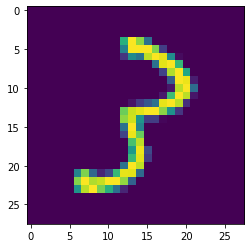

In [15]:
print('Please input a digit:')
i = int(input())
blind = X_test[i].reshape(28,28)
plt.imshow(blind)
x0 = X_test[i].reshape(input_layer,1)
x1 = sigmoid(w1.dot(x0)+b1)
x2 = sigmoid(w2.dot(x1)+b2)
print(f'The queried digit is {np.argmax(x2)}.  The correct digit is {np.argmax(y_test[i])}')

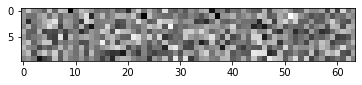

In [18]:
plt.imshow(w2,cmap='gray')

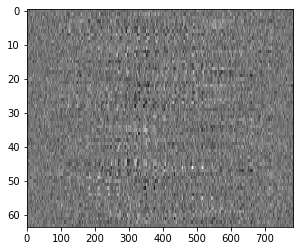

In [19]:
plt.imshow(w1,aspect=10,cmap='gray')